<a href="https://colab.research.google.com/github/xinmiaow/CPSC533R/blob/master/assignment2_preliminaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2, Preliminaries 

Turn the following expressions into tensor operations, replace any python for loop. Print the output and compare it to the sequential computation. 

**Hint:** Make yourself familiar with the following operations: ```torch.abs, torch.sum, torch.mean, torch.exp, torch.sqrt, torch.linspace, torch.meshgrid``` and ```tensor.permute, tensor.repeat, tensor.unsqueeze```, where tensor is a ```torch.tensor```.

In [2]:
# imports (nothing to do here)
import torch
import math
import matplotlib.pyplot as plt
prediction = torch.tensor([0.2,0.5,-1,0.9,5],dtype=torch.float)
label      = torch.tensor([0.19,0.4,-1.1,0.9,4.99],dtype=torch.float)

### Mean absolute error (MAE) computation

In [2]:
MAE = 0
for i in range(len(prediction)):
    MAE += torch.abs(prediction[i]-label[i])
MAE /= len(prediction)
print(MAE)

tensor(0.0440)


In [3]:
# tensor SOLUTION
torch.mean(torch.abs(prediction - label))

tensor(0.0440)

### Mean squared error 

In [4]:
MSE = 0
for i in range(len(prediction)):
    MSE += (prediction[i]-label[i])**2
MSE /= len(prediction)
print(MSE)

tensor(0.0040)


In [5]:
# tensor SOLUTION
torch.mean((prediction-label)**2)

tensor(0.0040)

### 1D polynomial evaluation

In [6]:
a = 0.1
b = 2
c = 0.5
f_of_x = []
x_list = torch.linspace(0,1,8)
for x in x_list:
    f_of_x.append(a + b*x + c*(x**2))
f_of_x = torch.FloatTensor(f_of_x)
print(f_of_x)

tensor([0.1000, 0.3959, 0.7122, 1.0490, 1.4061, 1.7837, 2.1816, 2.6000])


In [7]:
# tensor SOLUTION
a + b*x_list + c*x_list**2

tensor([0.1000, 0.3959, 0.7122, 1.0490, 1.4061, 1.7837, 2.1816, 2.6000])

### 2D Gaussian function

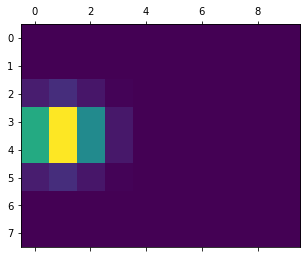

In [66]:
mu_x = 0.1
mu_y = 0.5
sigma = 0.1
x_list = torch.linspace(0,1,10)
y_list = torch.linspace(0,1,8)
f_of_x = torch.FloatTensor(8,10)
for i,x in enumerate(x_list):
    for j,y in enumerate(y_list):
        d = (x-mu_x)**2 + (y-mu_y)**2
        c = 1/math.sqrt(2*math.pi)
        f_of_x[j,i] = c*torch.exp(-d/(2*sigma**2))
plt.matshow(f_of_x)

torch.Size([10, 8])


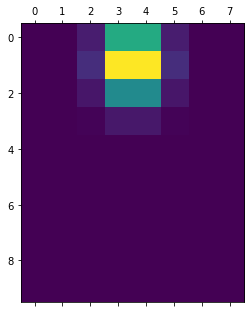

In [67]:
# tensor SOLUTION
grid_x, grid_y = torch.meshgrid(x_list, y_list)
grid_d = (grid_x - mu_x)**2 + (grid_y - mu_y)**2
grid_f = torch.exp(-grid_d/(2*sigma**2))/math.sqrt(2*math.pi)
print(grid_f.shape)
plt.matshow(grid_f)

Finally, use GPU computation (requires to run on a cuda capable machine with cuda installed) to turn the same operation on the GPU. Simply update your solution in the cell above. Compare the CPU and GPU output, is it the same? Up to what precision?

In [ ]:
# SOLUTION
